In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.duplicated().sum()

0

### Data Cleaning

In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [7]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Scale down the data

In [10]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.2,random_state=1)

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [20]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 2s 4ms/step - loss: 0.7508 - accuracy: 0.4411 - val_loss: 0.5937 - val_accuracy: 0.7975
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5378 - accuracy: 0.7972 - val_loss: 0.5044 - val_accuracy: 0.7975
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7972 - val_loss: 0.4850 - val_accuracy: 0.7975
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7972 - val_loss: 0.4771 - val_accuracy: 0.7975
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7972 - val_loss: 0.4705 - val_accuracy: 0.7975
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7972 - val_loss: 0.4636 - val_accuracy: 0.7975
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.7972 - val_loss: 0.4565 - val_accuracy: 0.7975

In [21]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [24]:
preds = np.where(y_pred>0.5,1,0)

In [30]:
y_test = y_test.to_numpy()

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)

0.835

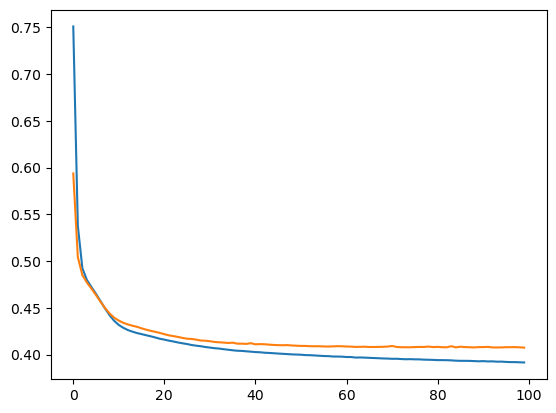

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

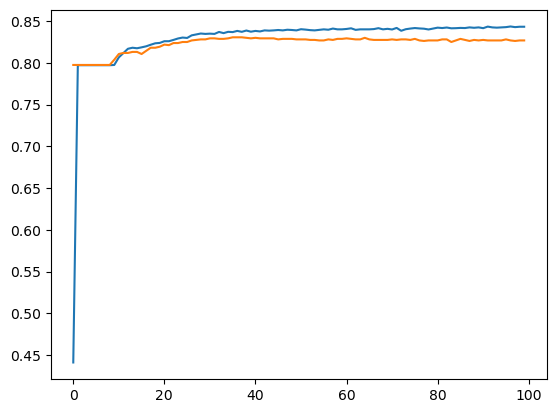

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])